In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, roc_curve, auc
from sklearn.datasets import make_classification
%config IPCompleter.greedy=True
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize': (12, 6)})

In [2]:
df = pd.read_csv("https://stepik.org/media/attachments/course/4852/training_mush.csv")

In [3]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [4]:
X = df.drop("class", axis=1)
y = df["class"]

In [5]:
clf = RandomForestClassifier(random_state=0)

In [7]:
params = {"n_estimators": range(10, 51, 10), "max_depth": range(1, 12, 2)
          , "min_samples_leaf": range(1, 7), "min_samples_split": range(2, 9, 2)}

In [7]:
cv_clf = GridSearchCV(clf, params, cv=3, n_jobs=-1)

In [8]:
cv_clf.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 51, 10)})

In [9]:
cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [10]:
best_clf = cv_clf.best_estimator_

In [11]:
best_features_df = pd.DataFrame({"features": X.columns,
                                 "features_importances": best_clf.feature_importances_}) \
                    .sort_values(by="features_importances", ascending=False)

<AxesSubplot:xlabel='features_importances', ylabel='features'>

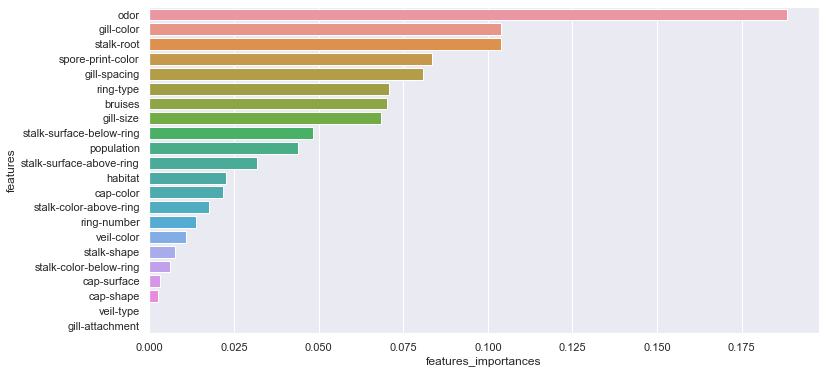

In [12]:
sns.barplot(x="features_importances", y="features", data=best_features_df, label="features")

In [13]:
X_test = pd.read_csv("https://stepik.org/media/attachments/course/4852/testing_mush.csv")

In [14]:
y_pred = best_clf.predict(X_test)

In [15]:
list(y_pred).count(1)

976

In [16]:
y_test = pd.read_csv("D:\\python\\jupyter\\files\\testing_y_mush.csv")

In [17]:
confusion_matrix(y_test, y_pred)

array([[1055,    0],
       [   0,  976]], dtype=int64)

<AxesSubplot:>

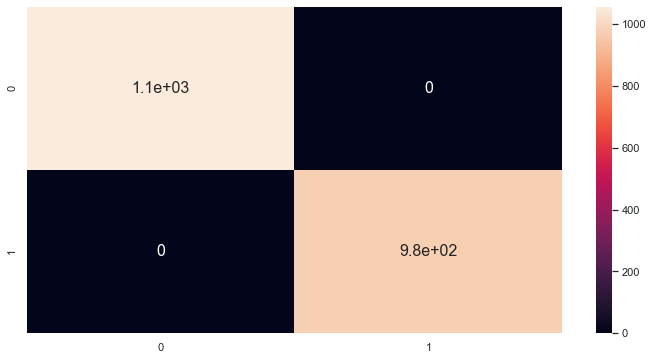

In [18]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,annot_kws={"size": 16})

In [19]:
###########################################################################################################

In [20]:
df = pd.read_csv("https://stepik.org/media/attachments/course/4852/invasion.csv")

In [21]:
df

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...,...
495,fighter,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,transport,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,fighter,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,fighter,8.278256,8.353756,268.121561,0.132661,361911,13.905809


In [22]:
df["class"].unique()

array(['transport', 'fighter', 'cruiser'], dtype=object)

In [23]:
y = df["class"]

In [24]:
X = df.drop("class", axis=1)

In [25]:
cv_clf.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 51, 10)})

In [26]:
cv_clf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [27]:
X_test = pd.read_csv("https://stepik.org/media/attachments/course/4852/operative_information.csv")

In [28]:
best_clf = cv_clf.best_estimator_

In [29]:
y_pred = best_clf.predict(X_test)

In [30]:
pd.Series(y_pred).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

In [31]:
best_features_df = pd.DataFrame({"features": X.columns,
                                 "features_importances": best_clf.feature_importances_}) \
                    .sort_values(by="features_importances", ascending=False)

In [32]:
best_features_df

,features,features_importances
3,brightness,0.363803
5,volume,0.257661
2,speed,0.171441
1,i_reflection,0.124372
0,g_reflection,0.082723
4,time_of_observance,0.000000


In [33]:
clf = tree.DecisionTreeClassifier(criterion="entropy")

In [34]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [35]:
# plt.figure(figsize=(17, 12))
# tree.plot_tree(clf, fontsize=16, feature_names=list(X), filled=True)

In [36]:
y_pred = clf.predict(X_test)

In [37]:
pd.Series(y_pred).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

In [38]:
best_features_df = pd.DataFrame({"features": X.columns,
                                 "features_importances": clf.feature_importances_}) \
                    .sort_values(by="features_importances", ascending=False)

In [39]:
best_features_df

,features,features_importances
3,brightness,0.688043
5,volume,0.311957
0,g_reflection,0.000000
1,i_reflection,0.000000
2,speed,0.000000
4,time_of_observance,0.000000


In [40]:
###########################################################################################################

In [11]:
df = pd.read_csv("https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv")

In [12]:
df

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1
...,...,...,...,...,...,...,...,...
99995,301.7,249.0,39.8244,0.397064,0,1,1,1
99996,194.0,350.0,25.6080,-1.062202,0,1,1,1
99997,201.4,112.0,26.5848,1.571040,0,1,1,1
99998,7.8,115.0,1.0296,-1.206575,0,1,1,1


In [13]:
X = df.drop("dangerous", axis=1)
y = df.dangerous

In [14]:
clf = RandomForestClassifier()

In [15]:
cv_clf = RandomizedSearchCV(clf, params, cv=3, n_jobs=-1)

In [16]:
cv_clf.fit(X, y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': range(1, 12, 2),
                                        'min_samples_leaf': range(1, 7),
                                        'min_samples_split': range(2, 9, 2),
                                        'n_estimators': range(10, 51, 10)})

In [17]:
clf = cv_clf.best_estimator_

In [18]:
best_features_df = pd.DataFrame({"features": X.columns,
                                 "features_importances": clf.feature_importances_}) \
                    .sort_values(by="features_importances", ascending=False)

In [19]:
best_features_df

,features,features_importances
5,buggers_were_noticed,0.532149
6,nearby_system_has_planemo,0.439527
4,black_hole_is_near,0.014784
3,dustiness,0.003784
0,r,0.003677
2,peradventure_index,0.003488
1,phi,0.002590


<AxesSubplot:>

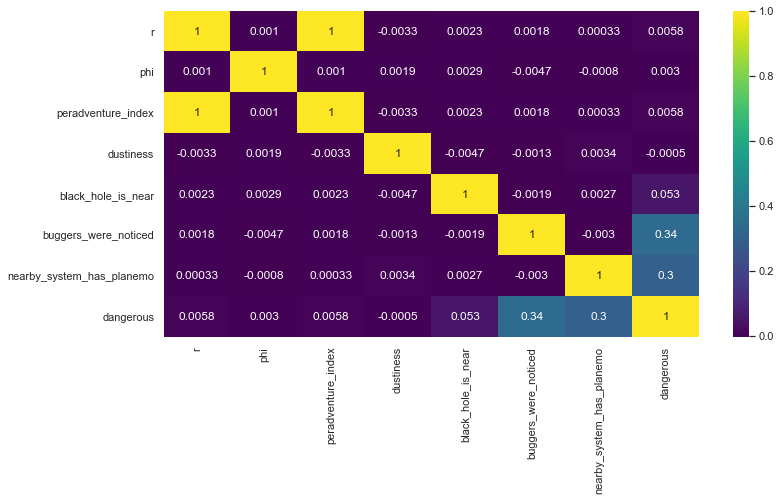

In [21]:
sns.heatmap(df.corr(),cmap='viridis',annot=True)